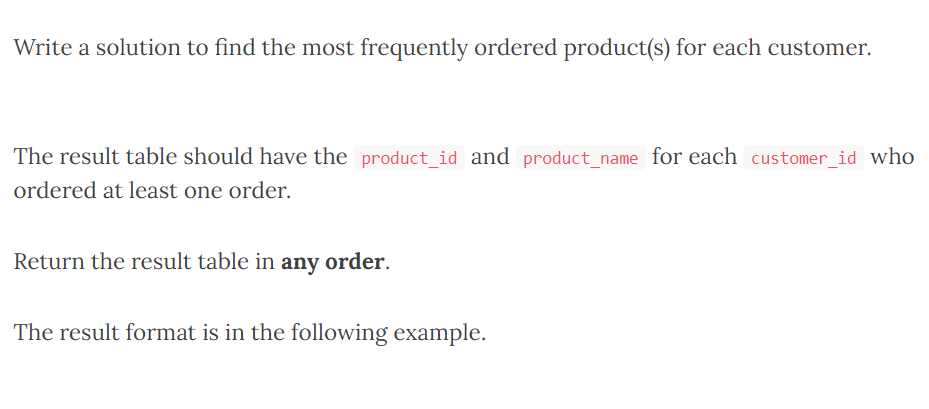

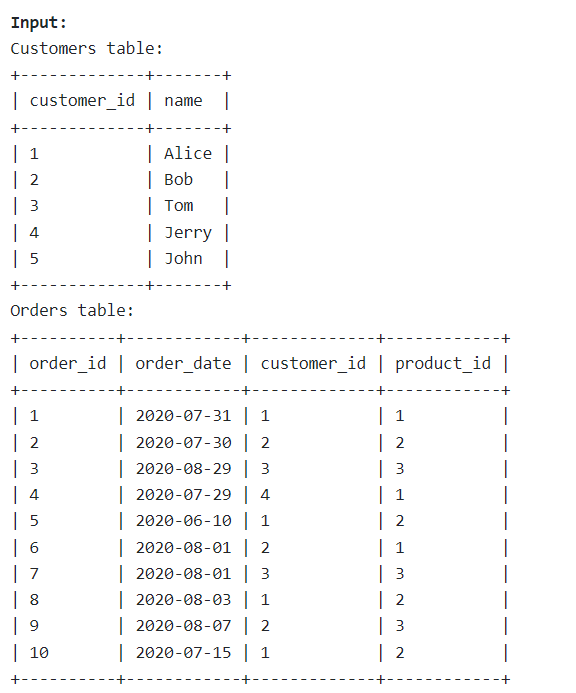

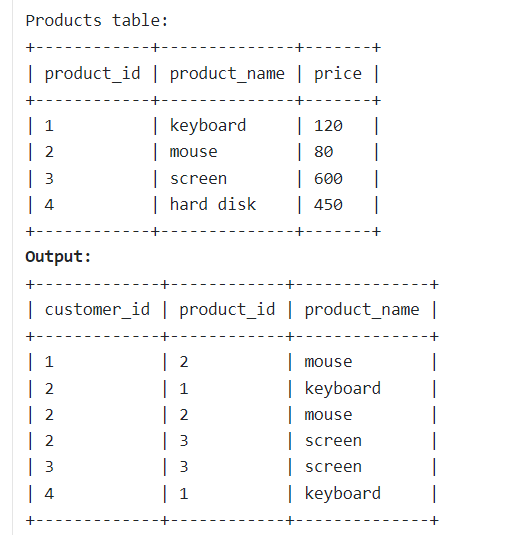

Explanation: 
Alice (customer 1) ordered the mouse three times and the keyboard one time, so the mouse is the most frequently ordered product for them.
Bob (customer 2) ordered the keyboard, the mouse, and the screen one time, so those are the most frequently ordered products for them.
Tom (customer 3) only ordered the screen (two times), so that is the most frequently ordered product for them.
Jerry (customer 4) only ordered the keyboard (one time), so that is the most frequently ordered product for them.
John (customer 5) did not order anything, so we do not include them in the result table.

    with cte as
    (
        Select customer_id,product_id, count(*) as num_ordered
        from Customers
        group by customer_id,product_id 
    ),
    cte2 as
    (
        Select *, FIRST_VALUE(num_ordered) 
            Over(Partition By customer_id Order By num_ordered DESC) as most_frequent
        From cte
    )

    Select c.customer_id
    from cte2 c
    Left Join Product p
    ON c.product_id = p.product_id
    Where c.num_ordered = c.most_frequent
